In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
%load_ext autoreload
%autoreload 2

from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

In [4]:
filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge')

Top neuron for #1, with weight: 0.4903928204723412
Best neuron: 11, animal_6
pearson R2 overall: 0.13138985326715966
pearson R2 average: 0.9447417621315335


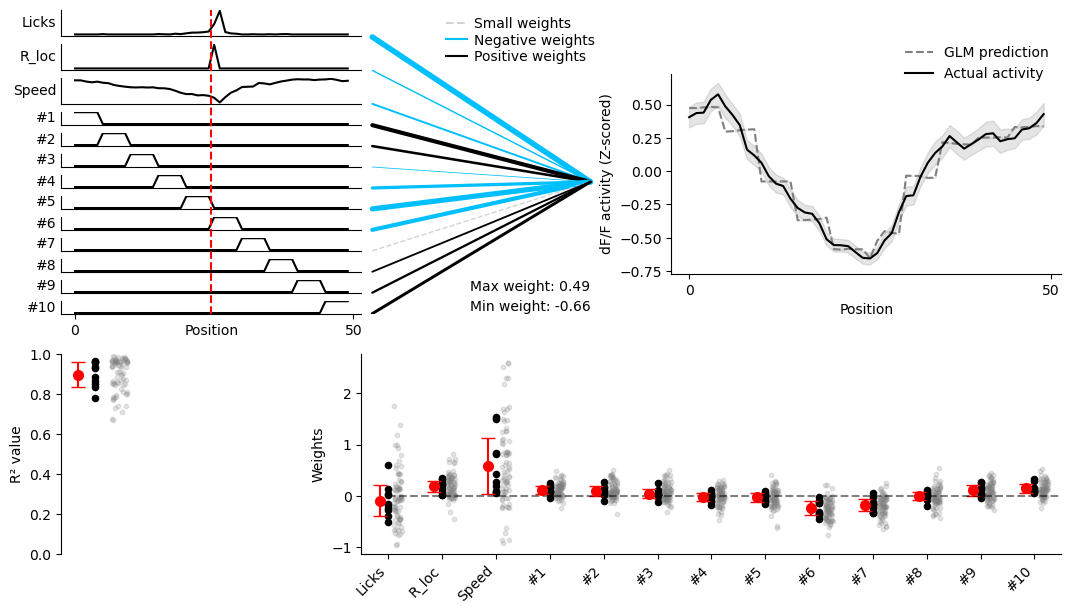

In [5]:
plot_example_neuron(reorganized_data, GLM_params, variable_list, model_name=filepath.split('.')[0], sort_by='#1')

In [182]:
datasets = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

fig = plt.figure(figsize=(18, 8))
axes = gs.GridSpec(nrows=len(datasets), ncols=4, hspace=0.6, wspace=0.3)

for i,filepath in enumerate(datasets):
    reorganized_data, variable_list = load_data(filepath)
    GLM_params_start = fit_GLM(reorganized_data, quintile=1, regression='ridge')
    GLM_params_end = fit_GLM(reorganized_data, quintile=5, regression='ridge')
    delta_weights = calculate_delta_weights(reorganized_data, GLM_params_start, GLM_params_end)

    ax = fig.add_subplot(axes[i, 1])
    plot_GLM_summary_data(GLM_params_start, variable_list, ax=ax)
    ax.set_title('First quintile')
    
    ax = fig.add_subplot(axes[i, 2])
    plot_GLM_summary_data(GLM_params_end, variable_list, ax=ax)
    ax.set_title('Last quintile')

    ax = fig.add_subplot(axes[i, 3])
    plot_R2_distribution(GLM_params_start, GLM_params_end, ax=ax)
    ax.set_xlim([0.5, 3.5])

    ax = fig.add_subplot(axes[i, 0])
    plot_delta_weights_summary(delta_weights, variable_list, model_name=filepath.split('.')[0], ax=ax)

    if i == 0:
        ax.scatter([],[], color='gray', label='Neurons', s=20)
        ax.scatter([],[], color='black', label='Animal avg', s=20)
        ax.scatter([],[], color='red', label='Overall avg', s=20)
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=False, handletextpad=0.5, labelspacing=0.2, borderpad=0)

fig.savefig('figures/delta_weights_summary.png', dpi=300)

KeyboardInterrupt: 

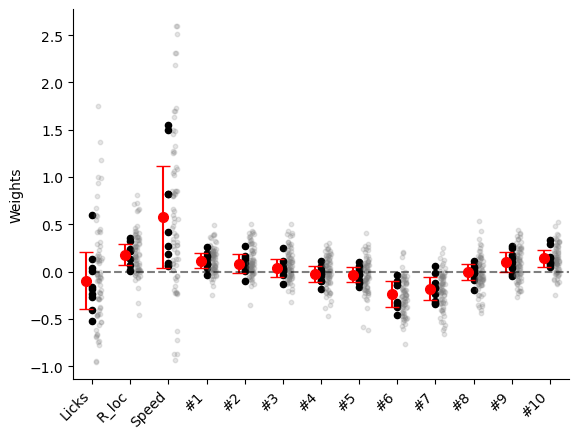

In [6]:
plot_GLM_summary_data(GLM_params, variable_list, ax=None)

In [7]:
residual_activity = compute_residual_activity(GLM_params, reorganized_data)

In [31]:
residuals = np.array([np.mean(residual_activity[animal][neuron], axis=1) for animal in residual_activity for neuron in residual_activity[animal]])

residuals = np.array(residuals)

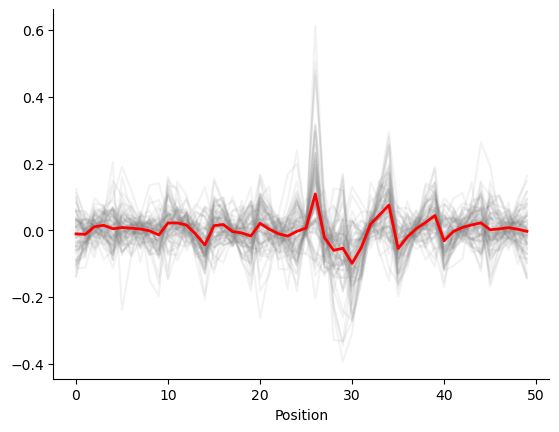

In [32]:
plt.plot(residuals.T, c='gray', alpha=0.1)   
plt.plot(np.mean(residuals, axis=0), c='r', lw=2) 
plt.xlabel('Position')
plt.show()